# LIBRERIAS

In [170]:
# Librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_classif, SelectKBest
import numpy as np
import json
from pickle import dump

# PASO 1: Planteamiento del problema y Recopilación de Datos.

-PLANTEAMIENTO DEL PROBLEMA:

- Queremos un modelo que identifique los clientes que tienen más posibilidades de contratar un deposito a largo plazo


-RECOPILACION DE DATOS:

In [171]:
#Recopilamos datos
data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=";")

#Además, vamos a guardarlo en el repositorio por seguridad.
raw_data_backup = data.to_csv("../data/raw/raw_data.csv", sep=";")

data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# PASO 2: Exploración y Limpieza de Datos.

- Obtener dimensiones del dataset

In [172]:
#Obtenemos dimensiones del dataset
data.shape

(41188, 21)

- Obtener informacion sobre tipos de datos y valores nulos.

In [173]:
#Obtenemos informacion sobre los tipos de datos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [174]:
#Obtenemos info sobre valores nulos

data.isna().sum().sort_values(ascending=False)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

-CONCLUSIONES:

- Dimensiones: 41188, 21
- Valores nulos: Sin valores nulos.
- Tipo de datos: 10 campos numéricos y 11 campos categoricos.

- Eliminacion de Duplicados

In [175]:
#Funcion para eliminar duplicados

#Columna identificadora del Dataset.
#id = "id" En este caso no es necesario porque no hay un identificador en el dataset

def EraseDuplicates(dataset):
    older_shape = dataset.shape
    if (dataset.duplicated().sum()):
        print ("Erase duplicates...")
        dataset.drop_duplicates(inplace = True)
        print(f"Total number of duplicates {dataset.duplicated().sum()}")
    else:
        print ("No coincidences.")
        pass
    
    print (f"The older dimension of dataset is {older_shape}, and the new dimension is {dataset.shape}.")
    
    return dataset

EraseDuplicates(data)

data

Erase duplicates...
Total number of duplicates 0
The older dimension of dataset is (41188, 21), and the new dimension is (41176, 21).


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


- Eliminacion de datos irrelevantes.

In [176]:
#Funcion para eliminar datos irrelevantes.

irrelevant_lst = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]

def EraseIrrelevants(dataset, lst):
    older_shape = data.shape
    print("Erase irrelevant´s dates...")
    dataset.drop(lst, axis = 1, inplace = True)
    print (f"The old dimension of dataset is {older_shape}, and the new dimension is {dataset.shape}.")
    return dataset

EraseIrrelevants(data, irrelevant_lst)

data

Erase irrelevant´s dates...
The old dimension of dataset is (41176, 21), and the new dimension is (41176, 16).


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,yes


-CRITERIOS DE ELIMINACION

- No considero que la tasa de variacion del empleo, el euribor, los indices de confianza y precios al consumidor y el número de empleados sea algo determinante a la hora de contratar un deposito a plazo fijo. En cambio campos como la edad, el trabajo, otros creditos poseidos y los datos relacionados con los contactos establecidos anteriormente si podría ser importantes.

# PASO 3: Analisis de variables univariantes

- Analisis sobre variables categóricas

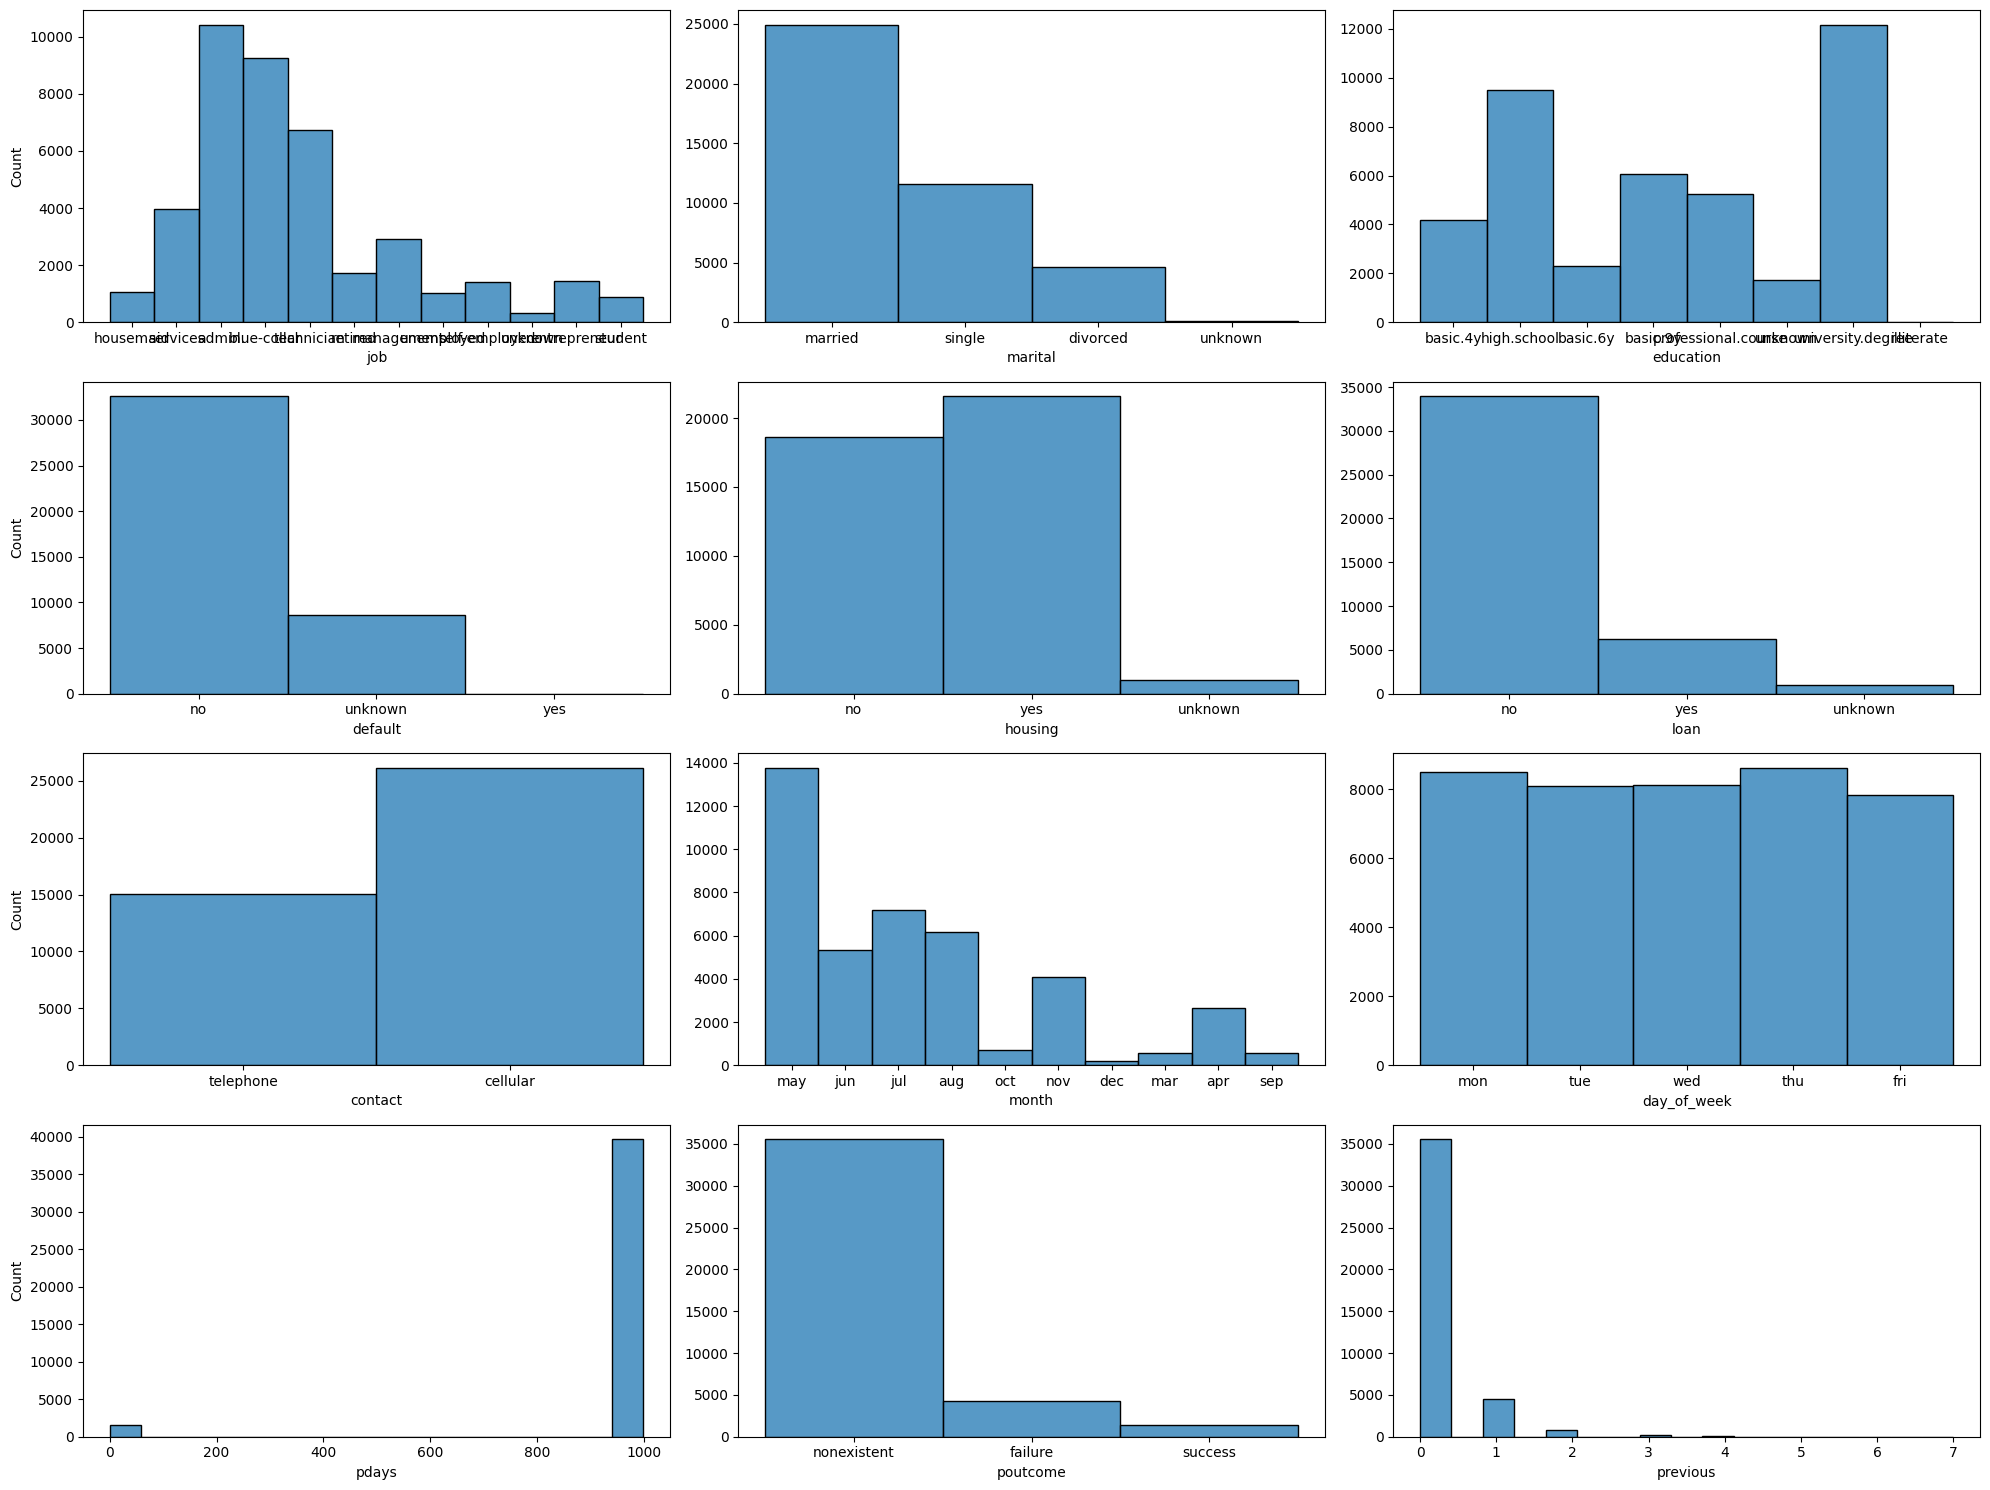

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64
education
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: count, dtype: int64


In [177]:
# Analisis sobre variables categoricas

def CategoricGraf(dataset):
    #Creamos la figura
    fig, axis = plt.subplots(4, 3, figsize=(20,15))

    #Creamos las graficas necesarias
    sns.histplot( ax = axis[0,0], data = dataset, x = "job")
    sns.histplot( ax = axis[0,1], data = dataset, x = "marital").set(ylabel = None)
    sns.histplot( ax = axis[0,2], data = dataset, x = "education").set(ylabel = None)
    sns.histplot( ax = axis[1,0], data = dataset, x = "default")
    sns.histplot( ax = axis[1,1], data = dataset, x = "housing").set(ylabel = None)
    sns.histplot( ax = axis[1,2], data = dataset, x = "loan").set(ylabel = None)
    sns.histplot( ax = axis[2,0], data = dataset, x = "contact")
    sns.histplot( ax = axis[2,1], data = dataset, x = "month").set(ylabel = None)
    sns.histplot( ax = axis[2,2], data = dataset, x = "day_of_week").set(ylabel = None)
    sns.histplot( ax = axis[3,0], data = dataset, x = "pdays")
    sns.histplot( ax = axis[3,1], data = dataset, x = "poutcome").set(ylabel = None)
    sns.histplot( ax = axis[3,2], data = dataset, x = "previous").set(ylabel = None)
   

    #Mostramos el grafico.
    plt.tight_layout()
    plt.show()

CategoricGraf(data)

print (data["job"].value_counts())
print (data["education"].value_counts())

-CONCLUSIONES:

- Job: La mayoria de clientes son administrativos, seguidos de cerca por obreros. Hay un segundo despunto de tecnicos y a partir de ahí todos los puestos tienen unas cantidades similares.
- Marital: Aproximadamente la mitad de los clientes están casados. Le siguen los solteros y en menor medida los divorciados.
- Education: Gran parte de los clientes tienen una carrera universitaria, otra parte considerable tienen una educación superior. Los clientes con formación profesional y educación básica de 9 años son los siguientes más comunes, siendo muy similares entre ellos.
- Default: La mayoria de los clientes actualmente no tienen un credito, hay una pequeña parte de la muestra de la cual se desconoce.
- Housing: Hay una similitud entre los clientes que tienen hipoteca y los que no. Hay una parte residual de clientes que no se sabe este dato.
- Loan: La gran mayoria de clientes no tiene un prestamo personal.
- Contact: Un tercio de los clientes tienen como forma de contacto principal las llamadas por teléfono móvil en lugar de teléfono fijo.
- Month: La mayoria de contactos se hicieron en Mayo con gran diferencia. Durante los meses de verano (jun, jul, ago) los contactos fueron altos y similares entre ellos.
- Day_Of_Week: Exceptuando los fines de semana no hay ninguna predilección en el día de contacto.
- Pdays: A la gran mayoría de clientes no se les ha contactado desde la última campaña.
- Poutcome: A la gran mayoria de clientes no se les contactó en la campaña anterior.
- Previous: La gran mayoria de clientes no ha tenido ningun contacto en la campaña anterior.

- Analisis sobre variables numéricas

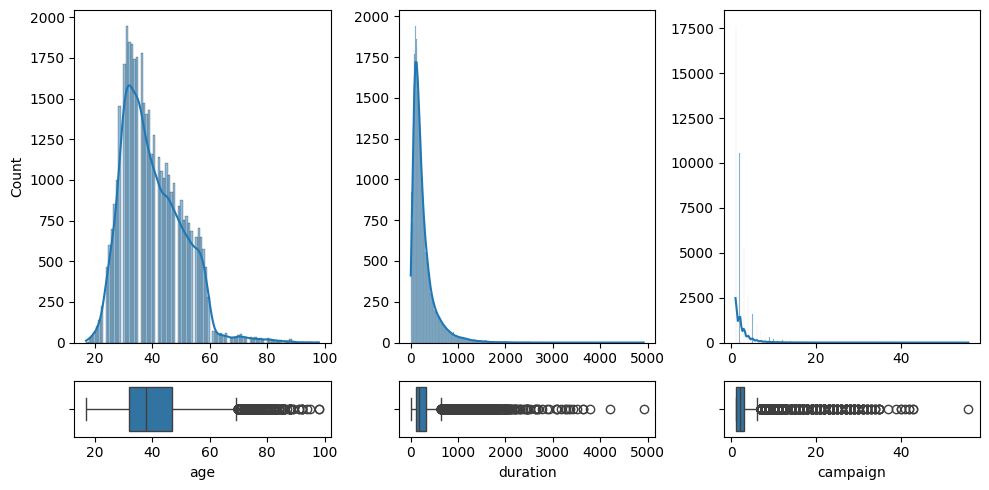

In [178]:
# Analisis sobre variables numericas

def NumericalGraf(dataset):
    #Creamos la figura
    fig, axis = plt.subplots(2, 3, figsize=(10,5), gridspec_kw={"height_ratios" : [6,1]})

    #Creamos las graficas necesarias
    sns.histplot( ax = axis[0,0], data = dataset, x = "age", kde = True).set(xlabel = None)
    sns.boxplot( ax = axis[1,0], data = dataset, x = "age")
    sns.histplot( ax = axis[0,1], data = dataset, x = "duration", kde=True).set(xlabel=None, ylabel = None)
    sns.boxplot( ax = axis[1,1], data = dataset, x = "duration")
    sns.histplot( ax = axis[0,2], data = dataset, x = "campaign", kde=True).set(xlabel = None, ylabel = None)
    sns.boxplot( ax = axis[1,2], data = dataset, x = "campaign")
    
    plt.tight_layout()
    plt.show()

NumericalGraf(data)

-CONCLUSIONES

- Duration: La duración media de las llamadas esta alrededor de los 2 minutos.

- Campaign: A la mayoria de clientes todavía no se les ha contactado durante esta campaña.

# PASO 4: Analisis de variable multivariante

- Analisis (Duration - Campaign) numérico/numérico

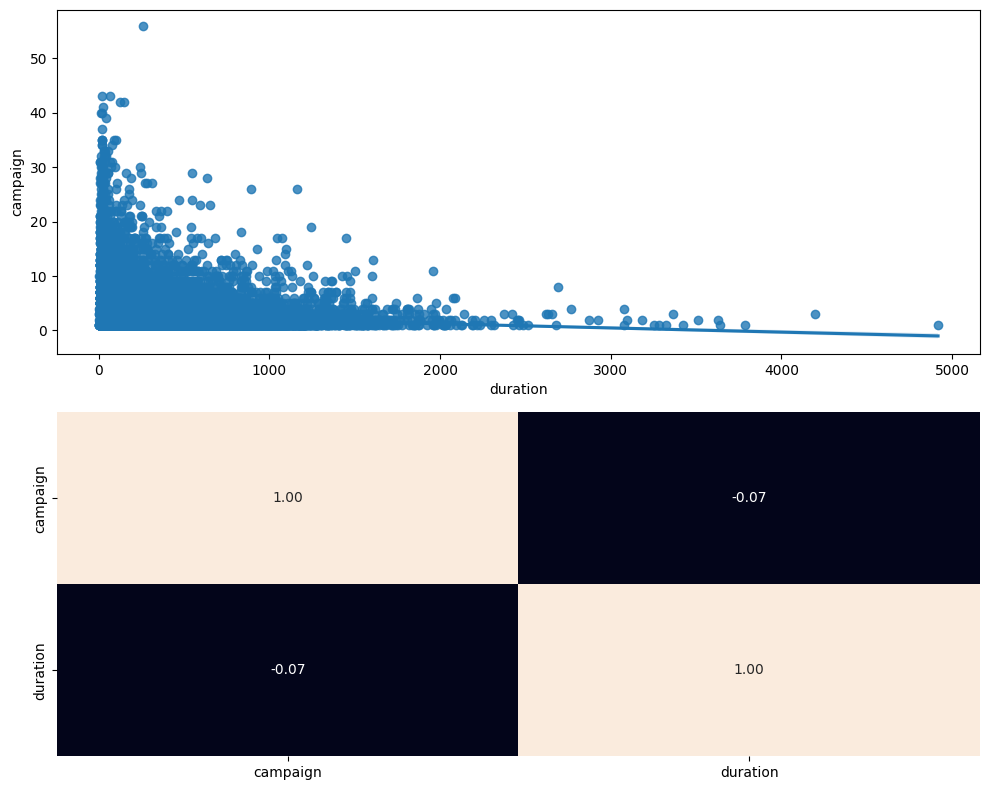

<Figure size 640x480 with 0 Axes>

In [179]:
#Analisis numerico/numerico

def NumNumAnalysi(dataset, x, y_list):
    #Creamos la figura
    fig, axis = plt.subplots(2, 1, figsize=(10,8))

    #Creamos la grafica
    sns.regplot( ax = axis[0], data = dataset, x = y_list[0], y = x)
    sns.heatmap( data[[x,y_list[0]]].corr(), annot=True, fmt=".2f", ax = axis[1], cbar=False)

    plt.tight_layout()
    plt.show()

    plt.tight_layout()
    plt.show()

NumNumAnalysi(data, "campaign", ["duration"])

-CONCLUSIONES:

- No hay correlación entre la duracion de las llamadas y las veces que se han contactado al cliente en esta campaña.

- Analisis Categórico/Categórico

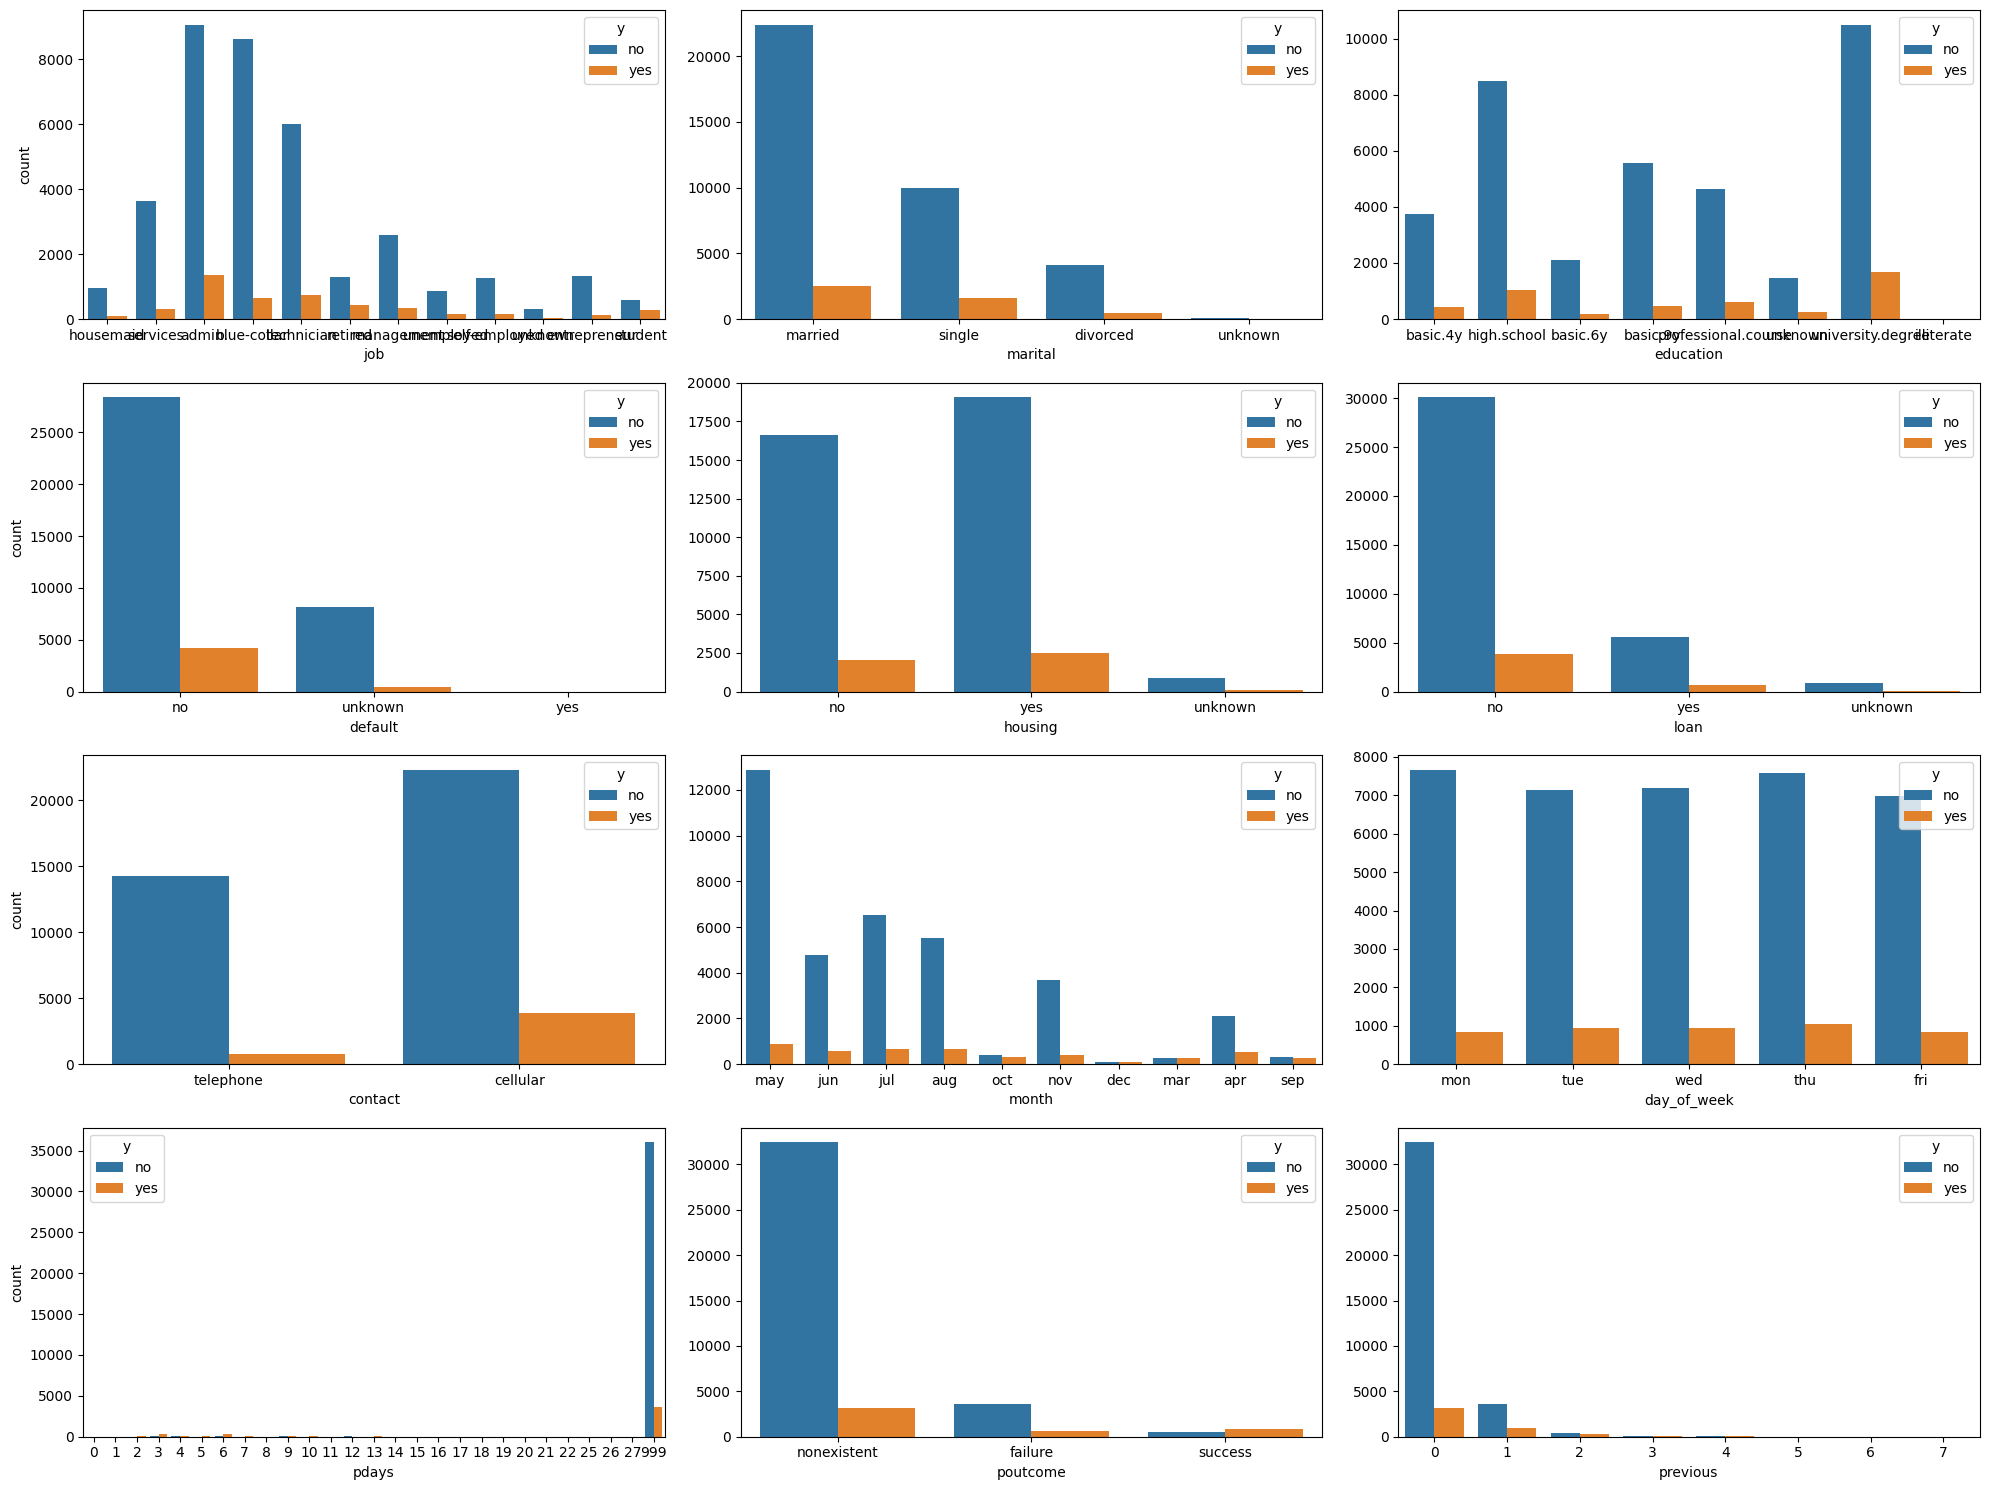

In [180]:
#Analisis categorico/categorico

def CatCatAnalysi(dataset):
    #Creamos la figura
    fig, axis = plt.subplots(4, 3, figsize=(20,15))

    #Creamos las graficas.
    sns.countplot(ax = axis[0,0], data = dataset, x = "job", hue = "y")
    sns.countplot(ax = axis[0,1], data = dataset, x = "marital", hue = "y").set(ylabel = None)
    sns.countplot(ax = axis[0,2], data = dataset, x = "education", hue = "y").set(ylabel = None)
    sns.countplot(ax = axis[1,0], data = dataset, x = "default", hue = "y")
    sns.countplot(ax = axis[1,1], data = dataset, x = "housing", hue = "y").set(ylabel = None)
    sns.countplot(ax = axis[1,2], data = dataset, x = "loan", hue = "y").set(ylabel = None)
    sns.countplot(ax = axis[2,0], data = dataset, x = "contact", hue = "y")
    sns.countplot(ax = axis[2,1], data = dataset, x = "month", hue = "y").set(ylabel = None)
    sns.countplot(ax = axis[2,2], data = dataset, x = "day_of_week", hue = "y").set(ylabel = None)
    sns.countplot(ax = axis[3,0], data = dataset, x = "pdays", hue = "y")
    sns.countplot(ax = axis[3,1], data = dataset, x = "poutcome", hue = "y").set(ylabel = None)
    sns.countplot(ax = axis[3,2], data = dataset, x = "previous", hue = "y").set(ylabel = None)

    plt.tight_layout()
    plt.show()

CatCatAnalysi(data)

-CONCLUSIONES:

- Job: Los clientes con un trabajo administrativo son los que más aceptan el deposito.

- Marital: Los clientes casados han aceptado más el deposito que los solteros y divorciados, aunque la diferencia no es muy grande.

- Education: Los clientes con mayor nivel formativo son los que más aceptan el deposito.

- Default: Los clientes sin creditos conocidos son los más propensos a aceptar el deposito.

- Housing: No hay gran diferencia entre los clientes que aceptan contratar el deposito respecto a si tienen o no una hipoteca.

- Loan: Los clientes que más aceptan contratar un deposito son aquellos que no tienen un prestamo.

- Contact: Los clientes que son contactados por móvil además de ser más numerosos son más propensos a aceptar contratar un deposito.

- Month & day_of_week: No parece existir ningún mes y dia preferente para aceptar la contratación de un deposito.

- pdays: Los clientes que hace más tiempo que no se les contacta son los que más aceptan contratar el deposito.

- poutcome: Aunque hay mayor cantidad de clientes que no se les ha contactado en la campaña anterior en comparativa los clientes que han aceptado la campaña anterior son los que más aceptan.

- previous: Los clientes que no han tenido contactos previos la campaña anterior son los que más aceptan contratar un deposito.

- Codificamos las variables categoricas

In [181]:
#Vamos a factorizar las variables categoricas -esta vez sin OHE.-

def Factorized(dataset, col):

    factorize = pd.factorize(dataset[col])
    parsin_dic = {}
    index = factorize[1]
    factor = list(set(factorize[0]))
    for i in range (len(factorize[1])):
        parsin_dic.update({index[i] : int(factor[i])})
    
    with open (f"../data/interim/{col}_parsing.json", "w") as j:
        json.dump(parsin_dic, j)
    
    dataset[col] = factorize[0]
    
    return dataset

Factorized(data, "job")
Factorized(data, "marital")
Factorized(data, "education")
Factorized(data, "default")
Factorized(data, "housing")
Factorized(data, "loan")
Factorized(data, "contact")
Factorized(data, "month")
Factorized(data, "day_of_week")
Factorized(data, "poutcome")
Factorized(data, "y")



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56,0,0,0,0,0,0,0,0,0,261,1,999,0,0,0
1,57,1,0,1,1,0,0,0,0,0,149,1,999,0,0,0
2,37,1,0,1,0,1,0,0,0,0,226,1,999,0,0,0
3,40,2,0,2,0,0,0,0,0,0,151,1,999,0,0,0
4,56,1,0,1,0,0,1,0,0,0,307,1,999,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,0,4,0,1,0,1,5,4,334,1,999,0,0,1
41184,46,3,0,4,0,0,0,1,5,4,383,1,999,0,0,0
41185,56,5,0,6,0,1,0,1,5,4,189,2,999,0,0,0
41186,44,4,0,4,0,0,0,1,5,4,442,1,999,0,0,1


- Creamos la tabla de correlaciones

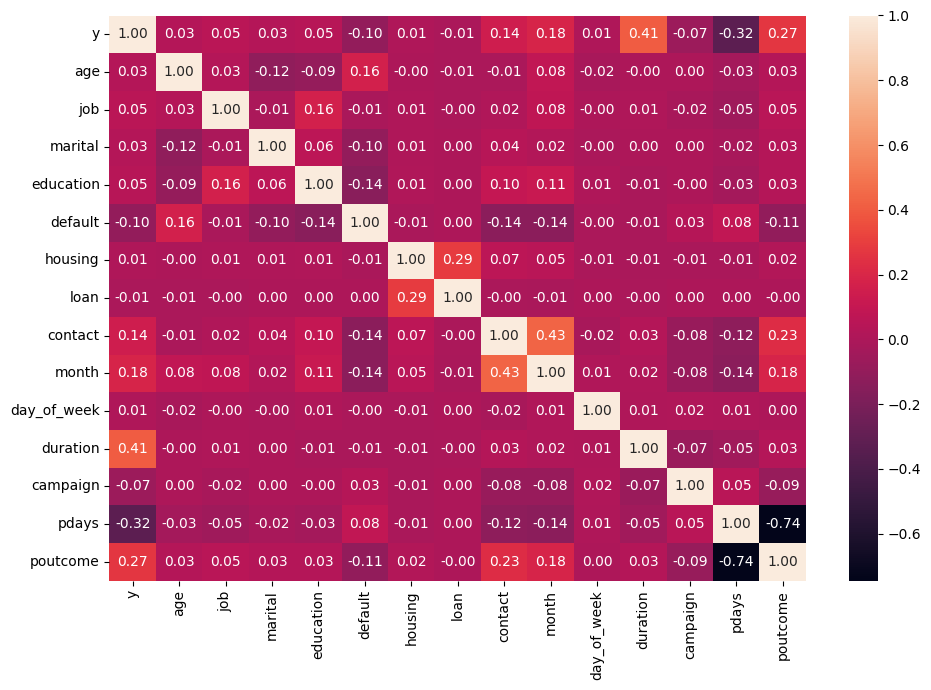

In [182]:
#Tabla de correlaciones
fig, axis = plt.subplots(figsize=(10,7))

sns.heatmap(data[["y", "age","job", "marital", "education", "default", "housing", "loan", "contact", "month", "day_of_week","duration","campaign", "pdays", "poutcome"]].corr(), annot=True, fmt=".2f")

plt.tight_layout()
plt.show()


- PRIMERAS CONCLUSIONES:

- El Target está relacionado con la duración de la llamada, los días transcurridos desde la última campaña hasta que el cliente fue contactado y el resultado de la campaña anterior. 

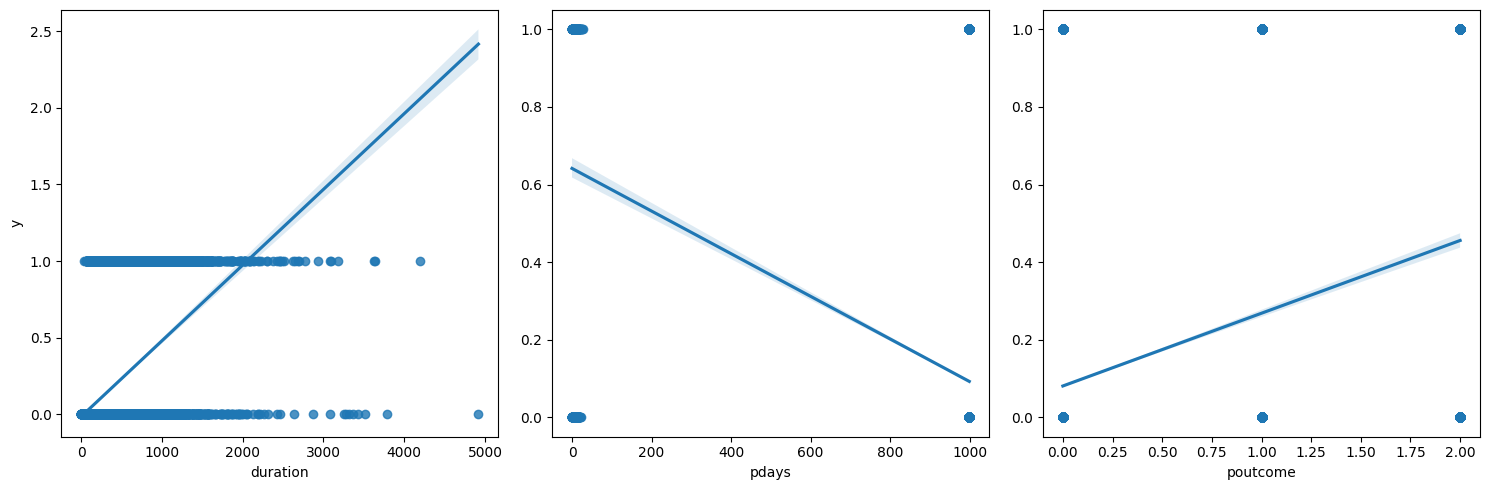

In [183]:
#Corroboración de la tabla
fig, axis = plt.subplots(1,3,figsize=(15,5))

sns.regplot(ax = axis[0], data = data, x = "duration", y = "y")
sns.regplot(ax = axis[1], data = data, x = "pdays", y = "y").set(ylabel = None)
sns.regplot(ax = axis[2], data = data, x = "poutcome", y = "y").set(ylabel = None)

plt.tight_layout()
plt.show()

- Corroboramos cuanto más dura la llamada más posibilidades hay de conseguir que el cliente.

- Corroboramos que cuantos más días pasan desde el último el cliente es más propenso a contratar

- Corroboramos que la aceptación de los clientes para contratar un deposito aumenta si anteriormente ya ha aceptado alguna otra campaña.

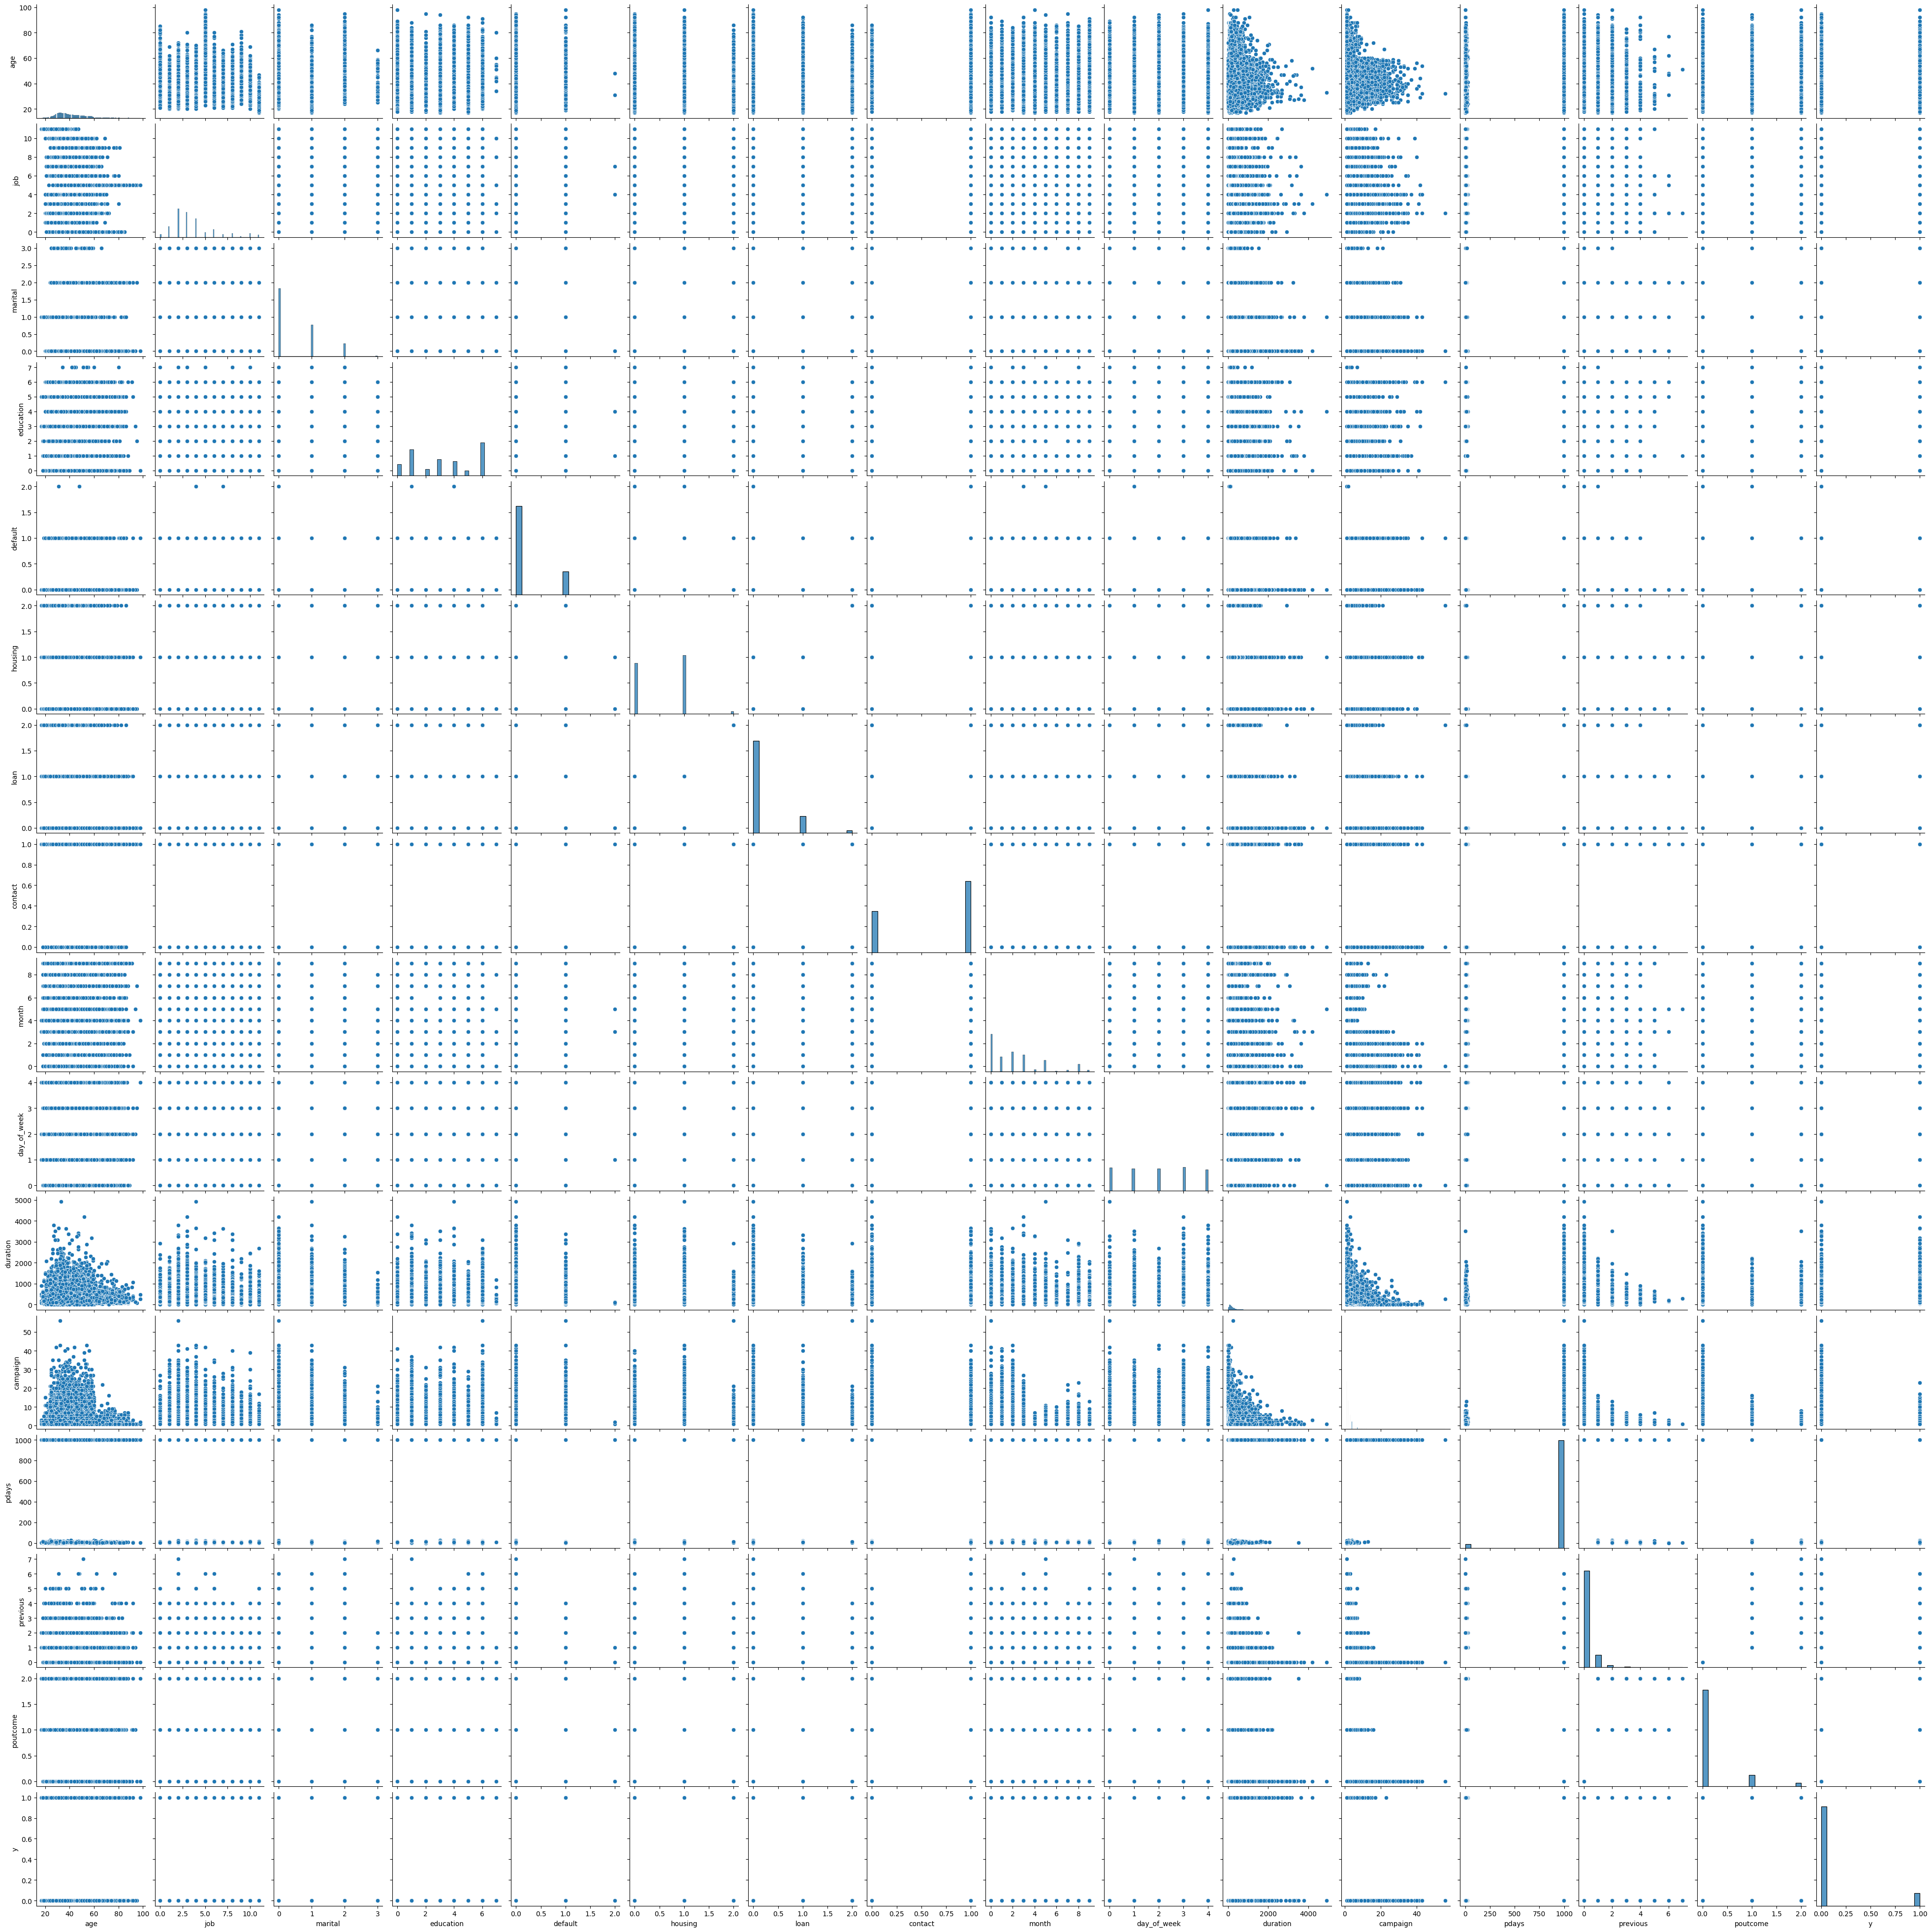

In [184]:
sns.pairplot(data)

# PASO 5: ingeniería de características.

- Analisis de Outliers

In [185]:
# Comprobamos las metricas de la tabla.

data.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
count,41176.00000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000,41176.000000
mean,40.02380,3.673863,0.510637,3.277370,0.208908,0.571959,0.199825,0.634714,2.249951,1.979600,258.315815,2.567879,962.464810,0.173013,0.169953,0.112663
std,10.42068,2.454340,0.696794,2.185558,0.406713,0.541216,0.456055,0.481516,2.429157,1.411539,259.305321,2.770318,186.937102,0.494964,0.455811,0.316184
min,17.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,32.00000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,102.000000,1.000000,999.000000,0.000000,0.000000,0.000000
50%,38.00000,3.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,2.000000,2.000000,180.000000,2.000000,999.000000,0.000000,0.000000,0.000000
75%,47.00000,4.000000,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,3.000000,3.000000,319.000000,3.000000,999.000000,0.000000,0.000000,0.000000
max,98.00000,11.000000,3.000000,7.000000,2.000000,2.000000,2.000000,1.000000,9.000000,4.000000,4918.000000,56.000000,999.000000,7.000000,2.000000,1.000000


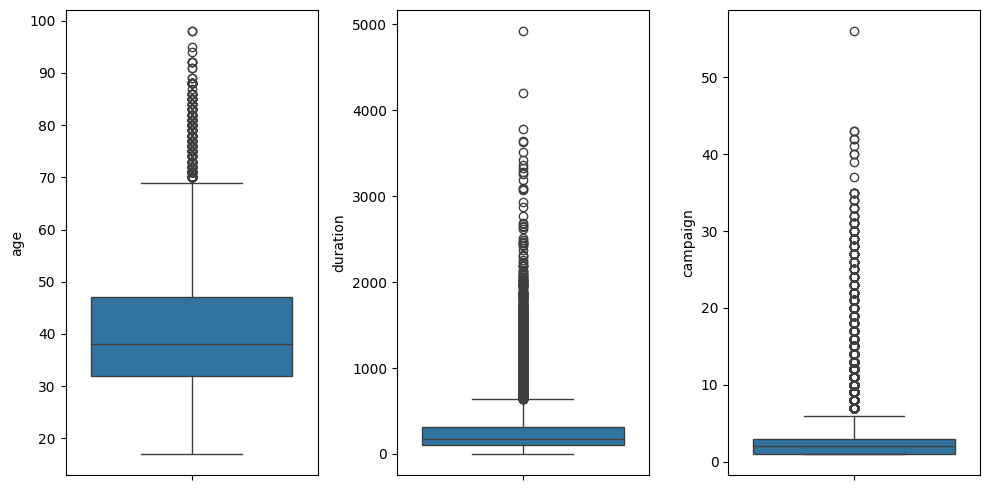

In [186]:
#Grafica de outliers

fig, axis = plt.subplots(1, 3, figsize=(10,5))

sns.boxplot( ax = axis [0], data = data, y = "age")
sns.boxplot( ax = axis [1], data = data, y = "duration")
sns.boxplot( ax = axis [2], data = data, y = "campaign")

plt.tight_layout()
plt.show()

In [188]:
#Hacemos dos copias del dataset, una para el dataset con outliers y otra sin.

data_with_outliers = data.copy()
data_without_outliers = data.copy()

#Creamos una funcion para transformar los outliers.

def TransOutliers(dataset, col_outliers):
    stats = dataset[col_outliers].describe()
    
    #Establecemos los límites.
    # Los valores óptimos para sumarle al Q3 suelen ser 1.5*IQR, 1.75*IQR y 2*IQR.
    iqr = stats["75%"] - stats["25%"]
    upper_limit = float(stats["75%"] + (2 * iqr))
    lower_limit = float(stats["25%"] - (2 * iqr))
    
    if (lower_limit < 0):
        lower_limit = 0

    #Ajustamos el outlier por encima.
    dataset[col_outliers] = dataset[col_outliers].apply(lambda x : upper_limit if (x > upper_limit) else x)

    #Ajustamos el outlier por debajo.
    dataset[col_outliers] = dataset[col_outliers].apply(lambda x : lower_limit if (x < lower_limit) else x)

    #Guardamos los límites en un json.

    with open (f"../data/interim/outerliers_{col_outliers}.json", "w") as j:
        json.dump({"upper_limit" : upper_limit, "lower_limit" : lower_limit}, j)

    return dataset

TransOutliers (data_without_outliers, "age")
TransOutliers (data_without_outliers, "duration")
TransOutliers (data_without_outliers, "pdays")

data_without_outliers

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,56.0,0,0,0,0,0,0,0,0,0,261.0,1,999.0,0,0,0
1,57.0,1,0,1,1,0,0,0,0,0,149.0,1,999.0,0,0,0
2,37.0,1,0,1,0,1,0,0,0,0,226.0,1,999.0,0,0,0
3,40.0,2,0,2,0,0,0,0,0,0,151.0,1,999.0,0,0,0
4,56.0,1,0,1,0,0,1,0,0,0,307.0,1,999.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73.0,5,0,4,0,1,0,1,5,4,334.0,1,999.0,0,0,1
41184,46.0,3,0,4,0,0,0,1,5,4,383.0,1,999.0,0,0,0
41185,56.0,5,0,6,0,1,0,1,5,4,189.0,2,999.0,0,0,0
41186,44.0,4,0,4,0,0,0,1,5,4,442.0,1,999.0,0,0,1


- Analisis de valores faltantes.

In [189]:
#Comprobamos si existen valores faltantes.

data_with_outliers.isna().sum().sort_values()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

In [190]:
data_without_outliers.isna().sum().sort_values()

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

En este caso no hay valores faltantes

- Inferencia de Nuevas características.

In [ ]:
#Inferencias de nuevas características.

En este caso no veo razones para crear nuevas características.

- Escalado de Valores

In [198]:
# Primero dividimos los dataframes entre test y train

features = ["age","job","marital","education","default","housing","loan","contact","month","day_of_week","duration", "campaign", "pdays", "previous", "poutcome"]
target_feature = ["y"]

def SplitData (dataset, num_features, target):
    x = dataset.drop(target, axis = 1)[num_features]
    y = dataset[target].squeeze()

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 42)

    return x_train, x_test, y_train, y_test

x_train_with_outliers, x_test_with_outliers, y_train, y_test = SplitData(data_with_outliers, features, target_feature)
x_train_without_outliers, x_test_without_outliers,_, _ = SplitData(data_without_outliers, features, target_feature)

y_train.to_csv("../data/processed/y_train.csv")
y_test.to_csv("../data/processed/y_test.csv")

In [199]:
#Tenemos que escalar los dataset con Normalizacion y con Escala mM (min-Max)

#Normalizacion
def StandardScaleData(dataset, num_features):
    scaler = StandardScaler()
    scaler.fit(dataset)

    x_scaler = scaler.transform(dataset)
    x_scaler = pd.DataFrame(dataset, index = dataset.index, columns = num_features)
    
    if(dataset is x_train_with_outliers):
        dump(scaler, open("../data/interim/standar_scale_with_outliers.sav", "wb"))

    elif(dataset is x_train_without_outliers):
        dump(scaler, open("../data/interim/standar_scale_without_outliers.sav", "wb"))

    return x_scaler

x_train_with_outliers_standarscale = StandardScaleData(x_train_with_outliers, features)
x_train_without_outliers_standarscale = StandardScaleData(x_train_without_outliers,features)
x_test_with_outliers_standscale = StandardScaleData(x_test_with_outliers, features)
x_test_without_outliers_standscale = StandardScaleData(x_test_without_outliers, features)

In [200]:
#Escala mM
def MinMaxScaleData(dataset, num_features):
    scaler = MinMaxScaler()
    scaler.fit(dataset)

    x_scaler = scaler.transform(dataset)
    x_scaler = pd.DataFrame(dataset, index = dataset.index, columns = num_features)

    if(dataset is x_train_with_outliers):
        dump(scaler, open("../data/interim/min-Max_Scale_with_outliers.sav", "wb"))

    elif(dataset is x_train_without_outliers):
        dump(scaler, open("../data/interim/min-Max_Scale_without_outliers.sav", "wb"))

    return x_scaler

x_train_with_outliers_mMScaler = MinMaxScaleData(x_train_with_outliers, features)
x_train_without_outliers_mMScaler = MinMaxScaleData(x_train_without_outliers,features)
x_test_with_outliers_mMScaler = MinMaxScaleData(x_test_with_outliers, features)
x_test_without_outliers_mMScaler = MinMaxScaleData(x_test_without_outliers, features)

# PASO 6: Selección de caracteristicas

In [234]:
#Seleccion de caracteristicas
k = 15
def SelectFeatures(dataset, y, filename, k = k):
    sel_model = SelectKBest(f_classif, k=k)
    sel_model.fit(dataset, y)
    col_name = sel_model.get_support()
    x_sel = pd.DataFrame(sel_model.transform(dataset), columns = dataset.columns.values[col_name])
    dump(sel_model, open(f"../data/interim/{filename}.sav", "wb"))
    return x_sel

In [235]:
#Dataset sin normalizacion
x_train_sel_with_outliers = SelectFeatures(x_train_with_outliers, y_train, "x_train_with_outliers")
x_test_sel_with_outliers = SelectFeatures(x_test_with_outliers, y_test, "x_test_with_outliers")
x_train_sel_without_outliers = SelectFeatures(x_train_without_outliers, y_train, "x_train_without_outliers")
x_test_sel_without_outliers = SelectFeatures(x_test_without_outliers, y_test, "x_test_without_outliers")

#Dataset Normalizado
x_train_sel_with_outliers_standarscale = SelectFeatures(x_train_with_outliers_standarscale, y_train, "x_train_with_outliers_standarscale")
x_test_sel_with_outliers_standarscale = SelectFeatures(x_test_with_outliers_standscale, y_test, "x_test_with_outliers_standscale")
x_train_sel_without_outliers_standarscale = SelectFeatures(x_train_without_outliers_standarscale, y_train, "x_train_sel_without_outliers_standarscale")
x_test_sel_without_outliers_standarscale = SelectFeatures(x_test_without_outliers_standscale, y_test, "x_test_without_outliers_standscale")

#Dataset Escalado min-Max
x_train_sel_with_outliers_mMScale = SelectFeatures(x_train_with_outliers_mMScaler, y_train, "x_test_with_outliers_mMScaler")
x_test_sel_with_outliers_mMScale = SelectFeatures(x_test_with_outliers_mMScaler, y_test, "x_test_with_outliers_mMScaler")
x_train_sel_without_outliers_mMScale = SelectFeatures(x_train_without_outliers_mMScaler, y_train, "x_train_without_outliers_mMScaler")
x_test_sel_without_outliers_mMScale = SelectFeatures(x_test_with_outliers_mMScaler, y_test, "x_test_with_outliers_mMScaler")

c:\Users\Fran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [12] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Fran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\Fran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [12] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Fran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\Fran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_selection\_univari

In [236]:
#Para acabara añadimos el target a los datasets.

target = "y"
def AgreeTarget(dataset, y, target = target):
    dataset[target] = list(y) #Si no le pones el list le pasa los indices y se crear valores NaN
    return dataset

AgreeTarget(x_train_sel_with_outliers, y_train)
AgreeTarget(x_test_sel_with_outliers, y_test)
AgreeTarget(x_train_sel_without_outliers, y_train)
AgreeTarget(x_test_sel_without_outliers, y_test)
AgreeTarget(x_train_sel_with_outliers_standarscale, y_train)
AgreeTarget(x_test_sel_with_outliers_standarscale, y_test)
AgreeTarget(x_train_sel_without_outliers_standarscale, y_train)
AgreeTarget(x_test_sel_without_outliers_standarscale, y_test)
AgreeTarget(x_train_sel_with_outliers_mMScale, y_train)
AgreeTarget(x_test_sel_with_outliers_mMScale, y_test)
AgreeTarget(x_train_sel_without_outliers_mMScale, y_train)
AgreeTarget(x_test_sel_without_outliers_mMScale, y_test)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,59,5,0,4,0,1,1,1,1,0,1460,1,999,0,0,1
1,34,3,0,3,0,0,0,1,0,0,248,1,999,1,1,0
2,32,4,0,4,0,1,0,1,4,2,275,2,999,0,0,1
3,53,2,0,1,0,1,1,1,0,0,186,2,999,1,1,0
4,24,1,1,3,0,1,0,0,2,2,184,1,999,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8231,53,3,0,0,0,0,0,1,3,1,76,1,999,0,0,0
8232,30,4,0,3,0,1,0,0,0,3,7,7,999,0,0,0
8233,54,7,0,6,1,0,0,0,2,3,106,1,999,0,0,0
8234,46,3,0,4,0,1,0,0,0,4,106,1,999,0,0,0


In [237]:
#Para acabar nos guardamos los datasets en un csv

def DataToCsv(dataset, filename):
    return dataset.to_csv(f"../data/processed/{filename}.csv")

DataToCsv(x_train_sel_with_outliers, "x_train_sel_with_outliers")
DataToCsv(x_test_sel_with_outliers, "x_test_sel_with_outliers")
DataToCsv(x_train_sel_without_outliers, "x_train_sel_without_outliers")
DataToCsv(x_test_sel_without_outliers, "x_test_sel_without_outliers")
DataToCsv(x_train_sel_with_outliers_standarscale, "x_train_sel_with_outliers_standarscale")
DataToCsv(x_test_sel_with_outliers_standarscale, "x_test_sel_with_outliers_standarscale")
DataToCsv(x_train_sel_without_outliers_standarscale, "x_train_sel_without_outliers_standarscale")
DataToCsv(x_test_sel_without_outliers_standarscale, "x_test_sel_without_outliers_standarscale")
DataToCsv(x_train_sel_with_outliers_mMScale, "x_train_sel_with_outliers_mMScale")
DataToCsv(x_test_sel_with_outliers_mMScale, "x_test_sel_with_outliers_mMScale")
DataToCsv(x_train_sel_without_outliers_mMScale, "x_train_sel_without_outliers_mMScale")
DataToCsv(x_test_sel_without_outliers_mMScale, "x_test_sel_without_outliers_mMScale")

y_test

36264    1
32672    0
40872    1
32907    0
16464    0
        ..
19004    0
34252    0
13575    0
1872     0
12339    0
Name: y, Length: 8236, dtype: int64

# ESTO YA NO ES PARTE DEL EDA

# Machine Learning

In [330]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

traindfs = [x_train_sel_with_outliers_standarscale, x_train_sel_without_outliers_standarscale, x_train_sel_with_outliers_mMScale, x_train_sel_without_outliers_mMScale]
testdfs = [ x_test_sel_with_outliers_standarscale, x_test_sel_without_outliers_standarscale, x_test_sel_with_outliers_mMScale, x_test_sel_without_outliers_mMScale]


def Training(traindataset, testdataset):
    results = []
    models = []

    for i in range(len(traindataset)):
        model = LogisticRegression()
        traindf = traindataset[i]

        model.fit(traindf, y_train)
        y_train_predict = model.predict(traindf)
        y_test_predict = model.predict(testdataset[i])
        result = {"index" : i, "train_score" : accuracy_score(y_train, y_train_predict), "test_score" : accuracy_score(y_test, y_test_predict)}
        results.append(result)
        models.append(model)
    return sorted(results, key = lambda x : x["train_score"], reverse=True), models

results, models = Training(traindfs, testdfs)

c:\Users\Fran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Fran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

- Nos quedamos con el index 1 (DATASET SIN OUTLIERS CON DATOS NORMALIZADOS)

In [291]:
x_train_sel_without_outliers_standarscale

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,29.0,10.0,0.0,2.0,0.0,1.0,1.0,0.0,2.0,4.0,286.0,3.0,999.0,0.0,0.0,0
1,50.0,2.0,1.0,6.0,0.0,0.0,0.0,0.0,1.0,2.0,178.0,6.0,999.0,0.0,0.0,0
2,29.0,2.0,1.0,6.0,0.0,0.0,0.0,1.0,3.0,1.0,103.0,4.0,999.0,0.0,0.0,0
3,35.0,2.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,3.0,135.0,1.0,999.0,0.0,0.0,0
4,40.0,3.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,418.0,1.0,999.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32935,34.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,1.0,100.0,2.0,999.0,0.0,0.0,0
32936,29.0,2.0,0.0,3.0,0.0,1.0,0.0,0.0,1.0,3.0,120.0,1.0,999.0,0.0,0.0,0
32937,71.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,3.0,250.0,2.0,999.0,2.0,1.0,0
32938,40.0,6.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,2.0,295.0,2.0,999.0,0.0,0.0,0


- Optimizacion de hiperparametros

In [322]:
#Creamos el diccionario de hiperparametros
hyperparameters = { "C" : np.linspace(0.0, 5.0, num=10), "penalty" : ["l1", "l2", "elasticnet", "None"], "solver" : ["lbfgs", "liblinear", "newton-cg", "sag", "saga"]}

hyperparameters

{'C': array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
        2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ]),
 'penalty': ['l1', 'l2', 'elasticnet', 'None'],
 'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']}

In [ ]:
#Pasamos el modelo preentrenado con los hiperparametros (En este caso paso un grid pero podría pasar un RandomSearchCV)
grid = GridSearchCV(models[1], hyperparameters, scoring="accuracy")

grid.fit(x_train_sel_without_outliers_standarscale, y_train)

c:\Users\Fran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Fran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Fran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Fran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Fran\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': array([0.        , 0.55555556, 1.11111111, 1.66666667, 2.22222222,
       2.77777778, 3.33333333, 3.88888889, 4.44444444, 5.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet', 'None'],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg', 'sag',
                                    'saga']},
             scoring='accuracy')

In [ ]:
#Guardamos los mejores parametros

grid.best_params_

{'C': np.float64(0.5555555555555556), 'penalty': 'l1', 'solver': 'liblinear'}

In [ ]:
#Guardamos el modelo entrenado

best_model = grid.best_estimator_

y_test_predict = best_model.predict(x_test_sel_without_outliers_standarscale)

accuracy_score(y_test, y_test_predict)

1.0

<function matplotlib.pyplot.show(close=None, block=None)>

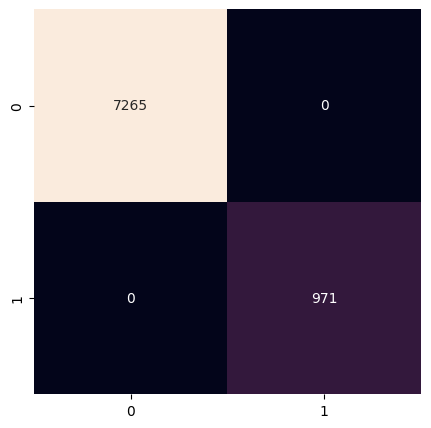

In [338]:
#Creamos la matriz de confusion para ver donde estaban los errores

confmatrx = pd.DataFrame(confusion_matrix(y_test, y_test_predict))

plt.figure(figsize=(5,5))

sns.heatmap(data = confmatrx, annot = True, fmt="d", cbar = False)

plt.show

- El modelo está perfectamente entrenado.